In [1]:
pip install numpy pandas matplotlib scikit-learn tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [42]:
# Path location:
file_path = "C:\\Users\\karti\\OneDrive\\Desktop\\TESLA.csv"
# Load the CSV file using the path:
data = pd.read_csv(file_path)

In [43]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Extracting the 'Close' prices as the target variable:
data = df[['Close']].values.astype(float)
# Normalizing the data:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
# Splitting the data into training and testing sets:
train_size = int(len(data) * 0.80)
train_data, test_data = data[:train_size], data[train_size:]

In [44]:
# Define the function to create sequences:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)
seq_length = 10  
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

In [45]:
# Create the model:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [46]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
42/42 [==============================] - 1s 3ms/step - loss: 0.1215
Epoch 2/50
42/42 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 3/50
42/42 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 4/50
42/42 [==============================] - 0s 3ms/step - loss: 7.7624e-04
Epoch 5/50
42/42 [==============================] - 0s 3ms/step - loss: 7.0745e-04
Epoch 6/50
42/42 [==============================] - 0s 3ms/step - loss: 6.9122e-04
Epoch 7/50
42/42 [==============================] - 0s 3ms/step - loss: 6.7879e-04
Epoch 8/50
42/42 [==============================] - 0s 4ms/step - loss: 6.3754e-04
Epoch 9/50
42/42 [==============================] - 0s 3ms/step - loss: 6.6726e-04
Epoch 10/50
42/42 [==============================] - 0s 3ms/step - loss: 6.4777e-04
Epoch 11/50
42/42 [==============================] - 0s 4ms/step - loss: 6.0497e-04
Epoch 12/50
42/42 [==============================] - 0s 3ms/step - loss: 5.8808e-04
Epoch 13/50
4

In [47]:
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")

11/11 [==============================] - 0s 2ms/step - loss: 5.6476e-04
Test Loss: 0.0006


In [48]:
predicted = model.predict(X_test)
# Inverse transform the predictions to the original scale:
predicted = scaler.inverse_transform(predicted)

11/11 [==============================] - 0s 2ms/step


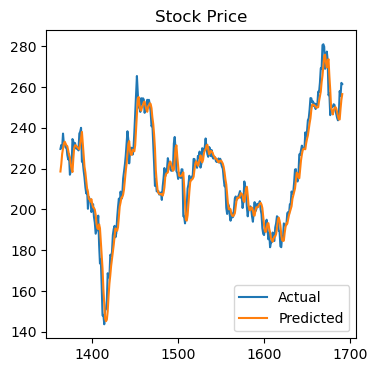

In [49]:
plt.figure(figsize=(4, 4))
plt.plot(df.index[-len(y_test):], scaler.inverse_transform(y_test), label='Actual')
plt.plot(df.index[-len(y_test):], predicted, label='Predicted')
plt.title('Stock Price')
plt.legend()
plt.show()